---
#### Author: Marcin Płodzień 
#### Affiliation: ICFO - Institute of Photonic Sciences
#### Email: marcin.plodzien@icfo.eu
#### Links:
1. [Marcin Plodzien Physics](https://sites.google.com/site/marcinplodzienphysics/home)
2. [GitHub](https://github.com/MarcinPlodzien)
3. [arxiv](https://arxiv.org/search/?query=P%C5%82odzie%C5%84%2C+Marcin&searchtype=author&abstracts=show&order=-announced_date_first&size=50)
---

# Unsupervised phase diagram with autoencoder for the one-dimensional Heisenberg-like model: A Tutorial
In this tutorial, we will use unsupervised techniques based on autoencoders to see boundaries on a phase diagram for the **quantum one-dimensional spin-$1/2$ model** in the presence of a **transverse field**.


# Anomaly detection for phase diagram boundaries discovery

Over the last years ML techniques have been used to study different problems in quantum many-body quantum systems. Using unsupervised techniques for studying quantum system properties is one of the most important aspect of modern machine learning and deep learning. We will see, how autoencoder architecture and anomaly detection can be used to study phase diagram of XXZ model for finite spin-1/2 chain.

The idea has been considered already in few works, including:
1. [Unsupervised Phase Discovery with Deep Anomaly Detection](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.170603), Phys. Rev. Lett. 125, 170603 (2020), Korbinian Kottmann, Patrick Huembeli, Maciej Lewenstein and Antonio Acín
2. [Unsupervised machine learning of topological phase transitions from experimental data](https://iopscience.iop.org/article/10.1088/2632-2153/abffe7/meta), Niklas Käming et al 2021 Mach. Learn.: Sci. Technol. 2 035037
3. [Unsupervised mapping of phase diagrams of 2D systems from
infinite projected entangled-pair states via deep anomaly detection](https://scipost.org/SciPostPhys.11.2.025/pdf), SciPost Phys. 11, 025 (2021), Korbinian Kottmann, Philippe Corboz, Maciej Lewenstein, and Antonio Acín
4. [Variational quantum anomaly detection: Unsupervised mapping of phase diagrams on a physical quantum computer](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.3.043184), Phys. Rev. Research 3, 043184 (2021), Korbinian Kottmann, Friederike Metz, Joana Fraxanet1, and Niccolò Baldelli
5.  [Unsupervised learning of phase transitions via modified anomaly detection with autoencoders](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.108.214428), Phys. Rev. B 108, 214428 (2023), Kwai-Kong Ng, and Min-Fong Yang





For introduction to AE see:
1. [Autoencoders and their applications in machine learning: a survey](https://link.springer.com/article/10.1007/s10462-023-10662-6) Berahmand, K., Daneshfar, F., Salehi, E.S. et al.  Artif Intell Rev 57, 28 (2024).
2. [Modern applications of machine learning in quantum sciences](https://arxiv.org/abs/2204.04198), arXiv:2204.04198, Anna Dawid, Julian Arnold, Borja Requena, Alexander Gresch, Marcin Płodzień, Kaelan Donatella, Kim A. Nicoli, Paolo Stornati, Rouven Koch, Miriam Büttner, Robert Okuła, Gorka Muñoz-Gil, Rodrigo A. Vargas-Hernández, Alba Cervera-Lierta, Juan Carrasquilla, Vedran Dunjko, Marylou Gabrié, Patrick Huembeli, Evert van Nieuwenburg, Filippo Vicentini, Lei Wang, Sebastian J. Wetzel, Giuseppe Carleo, Eliška Greplová, Roman Krems, Florian Marquardt, Michał Tomza, Maciej Lewenstein, Alexandre Dauphin


### The family of quantum Heisenberg models

The general one-dimensional quantum Heisenberg Hamiltonian with transverse field (open boundary conditions) is given by:
\begin{equation}
H = - \sum_{i=1}^{L-1} \left( J_x\hat{\sigma}^x_i \hat{\sigma}^x_{i+1} + J_y\hat{\sigma}^y_i \hat{\sigma}^y_{i+1} + \Delta \hat{\sigma}^z_i \hat{\sigma}^z_{i+1} \right) 
    - h_z \sum_{i=1}^L \hat{\sigma}^z_i
\end{equation}
where:
- $\hat{\sigma}^{x,y,z}_i$ are spin operators at site $i$ in a spin-$1/2$ chain,
- $\Delta$ is the anisotropy parameter,
- $h_z$ is the transverse field in the $z$-direction.

When $J_x = J_y = J_z$ we deal with $XXZ$ Hamiltonian, while when $J_y = \Delta = 0$, and $J_x\ne0$ we have quantum Ising model in a transvevrse field. The XXZ model (without transverse field) is exactly solvable by Bethe ansatz.

These models a cornerstone in quantum many-body physics, providing insights into quantum entanglement and spin interactions, see
1. Textbook: [Quantum Physics in One Dimension](https://academic.oup.com/book/27811) by Thierry Giamarchi.
2. Textbook: [An Introduction to Integrable Techniques for One-Dimensional Quantum Systems](https://link.springer.com/book/10.1007/978-3-319-48487-7) by Fabio Franchini.
3. Introduction to exactly solvable spin-$1/2$ models: [A pedagogical introduction to quantum integrability, with a view towards theoretical high-energy physics](https://pos.sissa.it/232/001)
4. [Modern Statistical Mechanics](https://users.ox.ac.uk/~phys1116/book.html) by Paul Fendley.

These models are topic of many research studies, focusing on their realization on quantum hardwared, as examples you can see:
1. [Preparing ground states of the XXZ model using the quantum annealing with inductively coupled superconducting flux qubits](https://arxiv.org/pdf/2112.12419)
2. [Exact Ising model simulation on a quantum computer](https://quantum-journal.org/papers/q-2018-12-21-114/)


To study numerically the model allowing extracting its thermodynamics limit (i.e. infinite system size) properties it is necessarry to consider large number of spins $L\gg 1$. The state-of-the-art numerical methods are based on tensor networks, Matrix Product States, and DMRG calculations. Here, we will work with small system sizes $L \le 10$, and we will construct exact matrix representation of the Hamiltonian, diagonalize it, calculate ground state and its properties.

### $J_1$-$J_2$ model
In this tutorial we will study, within the Exact Diagonalization approach, the extended Heisenberg XXX model in a transverse field
$h_z \ge 0$:
\begin{equation}
\begin{split}
\hat{H} & = - J_1\sum_{i=1}^{L-1} \left( \hat{\sigma}^x_i \hat{\sigma}^x_{i+1} + \hat{\sigma}^y_i \hat{\sigma}^y_{i+1} + \hat{\sigma}^z_i \hat{\sigma}^z_{i+1} \right) - J_2\sum_{i=1}^{L-2} \left( \hat{\sigma}^x_i \hat{\sigma}^x_{i+2} + \hat{\sigma}^y_i \hat{\sigma}^y_{i+2} + \hat{\sigma}^z_i \hat{\sigma}^z_{i+2} \right) 
    & - h_z \sum_{i=1}^L \hat{\sigma}^z_i,
    \end{split}
\end{equation}
This is XXX model extended by next-nearest-neighbours XXX model. We can define $J_1$ as an unit energy and deal with $\Delta=\frac{J_2}{J_1}$ amplitude, in the presence of the transverse field, then

\begin{equation}
\begin{split}
\hat{H} & = - \sum_{i=1}^{L-1} \left( \hat{\sigma}^x_i \hat{\sigma}^x_{i+1} + \hat{\sigma}^y_i \hat{\sigma}^y_{i+1} + \hat{\sigma}^z_i \hat{\sigma}^z_{i+1} \right) - \Delta\sum_{i=1}^{L-2} \left( \hat{\sigma}^x_i \hat{\sigma}^x_{i+2} + \hat{\sigma}^y_i \hat{\sigma}^y_{i+2} + \hat{\sigma}^z_i \hat{\sigma}^z_{i+2} \right) 
    & - h_z \sum_{i=1}^L \hat{\sigma}^z_i,
    \end{split}
\end{equation}

We will:
1. Construct the Hamiltonian for $L$ spins.
2. Perform exact diagonalization to find the ground state and compute observables.
3. Calculate entanglement entropy and analyze system properties.
4. Visualize the results.


The goal is to analyze ground state properties of the model for small system size $L$.

We need to start with definitions of many-body operators acting on $L$ spins-$1/2$ chain.


In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy.linalg import eigh, cholesky
import itertools
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from functools import reduce

In [2]:
# Define Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
identity = np.eye(2, dtype=complex)

### Function Definitions
The following functions are used throughout this notebook:
1. **Fock Basis Generation:** `generate_fock_basis` generates all possible spin configurations.
2. **Operators Construction:** `construct_operator` and `total_spin_operator` build spin operators for the system.

In [3]:
def generate_fock_basis(L):
    """
    Generate the Fock basis for L spins.

    Parameters:
        L (int): Number of spins.

    Returns:
        tuple: A tuple containing:
            - list of tuples: List where each tuple is a basis vector.
            - dict: Dictionary with spin vectors as keys and their indices as values.
    """
    # Total number of basis states is 2**L
    num_states = 2 ** L

    # Generate all basis vectors as binary representations of integers
    basis = []
    index_map = {}
    for i in range(num_states):
        binary_representation = format(i, f"0{L}b")  # Binary string with L bits
        spin_vector = tuple(1 - 2 * int(bit) for bit in binary_representation)  # Map 0 -> +1 (up), 1 -> -1 (down)
        basis.append(spin_vector)
        index_map[spin_vector] = i

    return basis, index_map

def construct_sigma_operator(sigma, L, site):
    """
    Constructs an operator acting on a specific site in an L-spin system.

    Args:
        pauli (np.ndarray): Pauli matrix for the operator.
        L (int): Number of spins.
        site (int): Site index (0-based) where the operator acts.

    Returns:
        np.ndarray: Operator acting on the full L-spin system.
    """
    operators = [identity if i != site else sigma for i in range(L)]
    return reduce(np.kron, operators)

def total_sigma_operator(L, sigma):
    """
    Construct the total spin operator for a specific component.

    Args:
        L (int): Number of spins.
        pauli (np.ndarray): Pauli matrix for the spin component (x, y, or z).

    Returns:
        np.ndarray: Total spin operator matrix.
    """
    return sum(construct_sigma_operator(sigma, L, i) for i in range(L))



### Function Definitions

The following functions are used throughout this notebook:
1. **Hamiltonian Construction:** `xxz_hamiltonian` constructs the XXZ model Hamiltonian.
2. **Exact Diagonalization:** `exact_ground_state` finds the ground state of the Hamiltonian.
3. **Entanglement Entropy:** Functions to compute partial traces and von Neumann entropy.


In [4]:
def xxz_hamiltonian(L, delta, hz):
    """
    Construct the XXZ Hamiltonian for L spins with anisotropy delta.

    Args:
        L (int): Number of spins.
        delta (float): Anisotropy parameter.
        h (float): transverse field

    Returns:
        np.ndarray: The XXZ Hamiltonian matrix.
    """
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L-1):

        j = i+1
 
        sigma_x_i = construct_sigma_operator(sigma_x, L, i)
        sigma_x_j = construct_sigma_operator(sigma_x, L, j)
        
        sigma_y_i = construct_sigma_operator(sigma_y, L, i)
        sigma_y_j = construct_sigma_operator(sigma_y, L, j)
        
        sigma_z_i = construct_sigma_operator(sigma_z, L, i)
        sigma_z_j = construct_sigma_operator(sigma_z, L, j)
      
        H += -( np.dot(sigma_x_i, sigma_x_j) + np.dot(sigma_y_i, sigma_y_j) + delta * np.dot(sigma_z_i, sigma_z_j) ) 

    for i in range(L-2):

        j = i+2
 
        sigma_x_i = construct_sigma_operator(sigma_x, L, i)
        sigma_x_j = construct_sigma_operator(sigma_x, L, j)
        
        sigma_y_i = construct_sigma_operator(sigma_y, L, i)
        sigma_y_j = construct_sigma_operator(sigma_y, L, j)
        
        sigma_z_i = construct_sigma_operator(sigma_z, L, i)
        sigma_z_j = construct_sigma_operator(sigma_z, L, j)
      
        H += -( np.dot(sigma_x_i, sigma_x_j) + np.dot(sigma_y_i, sigma_y_j) + delta * np.dot(sigma_z_i, sigma_z_j) )     
    
    for i in range(L):
        #sigma_z_i = construct_sigma_operator(sigma_z, L, i)
        #H += -hz*sigma_z_i

        sigma_x_i = construct_sigma_operator(sigma_x, L, i)
        H += -hz*sigma_x_i
    return H

In [5]:
def exact_ground_state(H):
    """
    Compute the ground state of a Hamiltonian via exact diagonalization.

    Args:
        H (np.ndarray): Hamiltonian matrix.

    Returns:
        tuple: Ground state wavefunction and its energy.
    """
    eigenvalues, eigenvectors = eigh(H)
    psi_0 = eigenvectors[:, 0]  
    return psi_0,  eigenvalues[0:5]

def density_matrix(psi):
    """
    Construct the density matrix for a given state.

    Args:
        psi (np.ndarray): Wavefunction.

    Returns:
        np.ndarray: Density matrix.
    """
    return np.outer(psi, psi.conj())


def cholesky_matrix_to_cholesky_vector(A):
    """
    Extract the non-zero elements of the lower triangular part of a Cholesky matrix A 
    (including the diagonal) into a vector.

    Args:
        A (np.ndarray): Cholesky matrix (assumed to be square and possibly complex).

    Returns:
        np.ndarray: Vector containing non-zero elements of the lower triangular part.
    """
    if not isinstance(A, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    if A.shape[0] != A.shape[1]:
        raise ValueError("Input matrix must be square.")
    
    # Extract the lower triangular part
    A_LT = np.tril(A)
    
    # Select non-zero elements only
    non_zero_indices = np.tril_indices(A.shape[0])
    L_real = np.real(A_LT[non_zero_indices])
    L_imag = np.imag(A_LT[non_zero_indices])
    
    # Concatenate real and imaginary parts
    return np.concatenate([L_real, L_imag])

def cholesky_vector_to_cholesky_matrix(vector):
    """
    Reconstruct a Cholesky matrix from a vector containing non-zero elements 
    of its lower triangular part (including diagonal).

    Args:
        vector (np.ndarray): Flattened vector containing real and imaginary parts of non-zero elements.

    Returns:
        np.ndarray: Reconstructed Cholesky matrix, potentially complex.
    """
    # Determine the total number of elements in the lower triangular part
    num_elements = len(vector) // 2  # Each element has real and imaginary parts

    # Solve for n using the quadratic formula
    n = int((-1 + np.sqrt(1 + 8 * num_elements)) / 2)
    
    if n * (n + 1) // 2 != num_elements:
        raise ValueError("Invalid vector length: cannot correspond to a lower triangular matrix.")

    # Split the vector into real and imaginary parts
    half_length = len(vector) // 2
    L_real = vector[:half_length]
    L_imag = vector[half_length:]
    
    # Combine into a complex array if imaginary part exists
    L = L_real + 1j * L_imag

    # Initialize an empty matrix
    A = np.zeros((n, n), dtype=complex)

    # Fill in the lower triangular part
    tril_indices = np.tril_indices(n)
    A[tril_indices] = L

    return A

def get_SvN(rho):
    """ Calculate reduced density matrix rho_A = Tr_B[rho_AB]
        and its von Neuman entanglement entropy S_vN = -Tr[rho_A log[rho_A]]
    """
    rho_A = np.zeros((2**L_A, 2**L_A), dtype = np.complex128)
    for ket_v_A in fock_basis_A:
        idx_v_A = index_map_A[ket_v_A]
        for ket_w_A in fock_basis_A:
            idx_w_A = index_map_A[ket_w_A]
            for ket_v_B in fock_basis_B:
                ket_v_A_v_B = ket_v_A + ket_v_B
                ket_w_A_v_B = ket_w_A + ket_v_B
                
                idx_1 = index_map_AB[ket_v_A_v_B]
                idx_2 = index_map_AB[ket_w_A_v_B]
                
                rho_A[idx_v_A, idx_w_A] += rho[idx_1, idx_2]
                
    lambdas = np.linalg.eigvalsh(rho_A)
    SvN = 0
    epsilon = 1e-10
    for lambda_ in lambdas:
        SvN = SvN - lambda_*np.log(lambda_ + epsilon)
    return rho_A, SvN

def get_observable_string(observable):
    title_string = observable
    if(observable == 'E_0'):
        title_string = r"$E_0$"
        
    if(observable == 'Sz' or observable == 'Sz_decoded'):
        title_string = r"$\langle\hat{S}_z\rangle$"
    
    if(observable == 'Sx' or observable == 'Sx_decoded'):
        title_string = r"$\langle\hat{S}_x\rangle$"
    
    if(observable == 'Sx_var' or observable == 'Sx_var_decoded'):
        title_string = r"$\langle\Delta^2\hat{S}_x\rangle$"
    
    if(observable == 'Sz_var' or observable == 'Sz_var_decoded'):
        title_string = r"$\langle\Delta^2\hat{S}_z\rangle$"
    
    if(observable == 'SvN' or observable == 'SvN_decoded'):
        title_string = r"$S_{\rm vN}$"
    return title_string


### Main Simulation

Now, we will we compute the ground state, and calulcate expectation values for the XXZ model for fixed system size $L$ for various values of:
- Anisotropy parameter $\Delta$
- Transverse field $h_z$

We will collect:
1. Ground state $|\psi_{gs}\rangle$
2. Eigenenergies of first $5$ eigenstates.
3. Expectation values of total spin operators $\hat{S}^{x,y,z}$ and their standard deviations.
4. von Neuman entanglement entropy of after partial trace of half of spins $S_{\rm vN} = -Tr_B(\hat{\rho}_{gs}\log\hat{\rho}_{gs})$, where
   $\hat{\rho}_{gs} = |\psi_{gs}\rangle\langle\psi_{gs}|$

We will use one trick: instead of storing the whole state $|\psi_{gs}\rangle$ we will store Cholesky decomposition of its density matrix $\hat{\rho}_{gs}$.

In general the Cholesky decomposition of a Hermitian matrix $\hat{\rho}$ reads
\begin{equation}
\hat{\rho} = AA^\dagger,
\end{equation}
where $A$ is lower-triangular matrix. Now, we can vectorize Cholesky matrix $A$, i.e. store its only lower-triangular elements as $A_{\rm vec} = [Re[A], Im[A]]$. Of course, having Cholesky vector we can restore original denisty matrix, see example:


In [6]:
# Check if mapping: rho -> cholesky_matrix -> cholesky_vector
# is consistent with: cholesky_vector -> cholesky_matrix -> rho
L = 8
dim = 2**L
psi = np.random.rand((2**L)) + 0*1j
psi = psi/np.sqrt(np.sum(np.abs(psi)**2))

rho = np.outer(psi.conj(), psi)
epsilon = 1e-6
rho = (1-epsilon)*rho + epsilon*np.eye(dim)/dim

A = cholesky(rho, lower=True)
A_vec = cholesky_matrix_to_cholesky_vector(A)
A_ = cholesky_vector_to_cholesky_matrix(A_vec)
rho_ = A_@A_.conj().T/np.trace(A_@A_.conj().T)            
print("Check if Cholesky decomposition and vectorization is consistent: ", np.allclose(rho, rho_))

Check if Cholesky decomposition and vectorization is consistent:  True


### Cholesky Decomposition in practice

Cholesky decomposition is a matrix factorization method used for symmetric and positive-definite matrices, i.e. for a given  Hermitian (or symmetric) positive-definite matrix $\rho$, we can find its representation in the form:
\begin{equation}
\rho = \frac{A A^\dagger}{Tr[A A^\dagger]},
\end{equation}
where $A$ is a lower triangular matrix with real and positive diagonal entries.

The Cholesky decomposition of a matrix $\rho$ is computed element by element. For $\rho = A A^\dagger$, where $A$ is a lower triangular matrix, the entries of $A$ are calculated as:
1. For diagonal elements:
    $A_{ii} = \sqrt{\rho_{ii} - \sum_{k=1}^{i-1} A_{ik}^2}$
2. For off-diagonal elements:
    $A_{ij} = \frac{1}{A_{jj}} \left(\rho_{ij} - \sum_{k=1}^{j-1} A_{ik} A_{jk}\right)$
    for $i > j$.


Cholesky decomposition requires that $\rho$ must be positive-definite, i.e. all eigenvalues of $\rho$ are greater than zero.
If these conditions are not satisfied, the Cholesky decomposition does not exist.
When $\rho$ is nearly positive-definite (e.g., due to numerical precision errors), Cholesky decomposition can fail. In such cases, regularization techniques is needed, by adding a small multiple of the identity matrix to $\rho$, i.e. $\rho' = (1-\epsilon)\rho + \frac{\epsilon}{dim(\rho)} \mathbb{1}$, where $\epsilon$ is a small positive number, and $\mathbb{1}$ is diagonal matrix. This adjustment ensures $\rho'$ is positive-definite and allows Cholesky decomposition to proceed.
For $\epsilon \approx 10^{-6}$ the regularization only slightly alters $\rho$ but ensures numerical stability. Cholesky decomposition is widely used in analysis of  density matices in quantum mechanics.

### Main loop
In the following, we will calculate and store in pandas dataframe all quantities of interest. We will loop over $\Delta \in [-2,2]$ and $h_z \in [0,3]$ for fixed $L$, and store the dataframe to file

In [7]:
def XXX_XXX_hamiltonian(L, delta, hz):
    """
    Construct the XXZ Hamiltonian for L spins with anisotropy delta.

    Args:
        L (int): Number of spins.
        delta (float): Anisotropy parameter.
        h (float): transverse field

    Returns:
        np.ndarray: The XXZ Hamiltonian matrix.
    """
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L-1):

        j = i+1
 
        sigma_x_i = construct_sigma_operator(sigma_x, L, i)
        sigma_x_j = construct_sigma_operator(sigma_x, L, j)
        
        sigma_y_i = construct_sigma_operator(sigma_y, L, i)
        sigma_y_j = construct_sigma_operator(sigma_y, L, j)
        
        sigma_z_i = construct_sigma_operator(sigma_z, L, i)
        sigma_z_j = construct_sigma_operator(sigma_z, L, j)
      
        H += -( np.dot(sigma_x_i, sigma_x_j) + np.dot(sigma_y_i, sigma_y_j) + np.dot(sigma_z_i, sigma_z_j) ) 

    for i in range(L-2):

        j = i+2
 
        sigma_x_i = construct_sigma_operator(sigma_x, L, i)
        sigma_x_j = construct_sigma_operator(sigma_x, L, j)
        
        sigma_y_i = construct_sigma_operator(sigma_y, L, i)
        sigma_y_j = construct_sigma_operator(sigma_y, L, j)
        
        sigma_z_i = construct_sigma_operator(sigma_z, L, i)
        sigma_z_j = construct_sigma_operator(sigma_z, L, j)
      
        H += -delta*( np.dot(sigma_x_i, sigma_x_j) + np.dot(sigma_y_i, sigma_y_j) + np.dot(sigma_z_i, sigma_z_j) )     
    
    for i in range(L):
        sigma_z_i = construct_sigma_operator(sigma_z, L, i)
        H += hz*sigma_z_i
        
    return H

In [8]:
L_values = [6]

delta_values = np.arange(-0.4, -.27, 0.001)
hz_values = np.arange(0, 0.15, 0.001)

for L in L_values:
    data = []
    dim = 2**L
    
    L_A = L//2
    L_B = L - L_A
    fock_basis_AB, index_map_AB = generate_fock_basis(L)
    fock_basis_A, index_map_A  = generate_fock_basis(L_A)
    fock_basis_B, index_map_B = generate_fock_basis(L_B)
    
    
    Sx_total = total_sigma_operator(L, sigma_x)/2.0 #we divide by 2 to have proper spin-chain operators
    Sy_total = total_sigma_operator(L, sigma_y)/2.0 #we divide by 2 to have proper spin-chain operators
    Sz_total = total_sigma_operator(L, sigma_z)/2.0 #we divide by 2 to have proper spin-chain operators
   
    
    for delta in tqdm(delta_values):
        for hz in hz_values:
            if(delta !=0 and hz !=0): 
                H = XXX_XXX_hamiltonian(L, delta, hz)
                psi_gs, E_vec = exact_ground_state(H)
                
                rho_gs = density_matrix(psi_gs)
                epsilon = 1e-6
                rho_gs = (1-epsilon)*rho_gs + epsilon*np.eye(dim)/dim
                _, SvN = get_SvN(rho_gs)
        
                A_gs = cholesky(rho_gs, lower=True)
                A_gs_vec = cholesky_matrix_to_cholesky_vector(A_gs)
        
                # Check if mapping: rho -> cholesky_matrix -> cholesky_vector
                # is consistent with: cholesky_vector -> cholesky_matrix -> rho
                # A_gs_ = cholesky_vector_to_cholesky_matrix(A_gs_vec)
                # rho_gs_ = A_gs_@A_gs_.conj().T/np.trace(A_gs_@A_gs_.conj().T)            
                # print(np.allclose(rho_gs, rho_gs_))
                
                # Compute expectation values of total spin operators
                Sx = np.real(np.vdot(psi_gs, Sx_total @ psi_gs))
                Sy = np.real(np.vdot(psi_gs, Sy_total @ psi_gs))
                Sz = np.real(np.vdot(psi_gs, Sz_total @ psi_gs))
    
                SxSx = np.real(np.vdot(psi_gs, Sx_total@Sx_total @ psi_gs))
                SySy = np.real(np.vdot(psi_gs, Sy_total@Sy_total @ psi_gs))
                SzSz = np.real(np.vdot(psi_gs, Sz_total@Sz_total @ psi_gs))
                
                Sx_var = SxSx - Sx**2
                Sy_var = SySy - Sy**2
                Sz_var = SzSz - Sz**2   
    
                data.append({
                    "L"         : L,
                    "delta"     : delta,
                    "hz"        : hz, 
                    "SvN"       : SvN,
                    "E_0"       : E_vec[0],
                    "E_1"       : E_vec[1],
                    "E_2"       : E_vec[2],
                    "E_3"       : E_vec[3],
                    "E_4"       : E_vec[4],
                    "Sx"        : Sx,
                    "Sy"        : Sy,
                    "Sz"        : Sz,
                    "Sx_var"    : Sx_var,
                    "Sy_var"    : Sx_var,
                    "Sz_var"    : Sx_var,
                    "A_gs_vec"  : A_gs_vec,
                })
    df_all = pd.DataFrame(data)   
    df_all.to_pickle("./data_XXZ_ground_state_properties_L." + "{:02d}".format(L) + ".pkl")

100%|█████████████████████████████████████████| 130/130 [02:17<00:00,  1.06s/it]


With pandas dataframes we can easily access informations for different parameters:

In [9]:
hz = 0.1
delta = 0
cond_hz = np.abs(df_all["hz"]-hz)<1e-6
cond_delta = np.abs(df_all["delta"]-delta)<1e-6

df_ = df_all[cond_hz & cond_delta]
E_0 = df_['E_0'].values[0]
Sx  = df_['Sx'].values[0]
Sy  = df_['Sy'].values[0]
Sz  = df_['Sz'].values[0]
SvN = df_['SvN'].values[0]

Sx_var  = df_['Sx_var'].values[0]
Sy_var  = df_['Sy_var'].values[0]
Sz_var  = df_['Sz_var'].values[0]

monitor_string_1 = "L = {:d} | delta = {:2.2f} | h_z = {:2.2f}".format(L, delta, hz)
monitor_string_2 = "      E_0 = {:2.2f} | SvN = {:2.2f}".format(E_0, SvN)
monitor_string_3 = "     <Sx> = {:2.2f}  | <Sy>     = {:2.2f}  |     <Sz> = {:2.2f} ".format(Sx, Sy, Sz)
monitor_string_4 = " <Sx_var> = {:2.2f}  | <Sy_var> = {:2.2f}  | <Sz_var> = {:2.2f} ".format(Sx_var, Sy_var, Sz_var)
print(monitor_string_1)
print(monitor_string_2)
print(monitor_string_3)
print(monitor_string_4)

### Phases of the model

Let us have a look at properties of the system as a function of $\Delta$ and $h_z$. The easiest step will be to look at density plots of:
1. Ground state energy $E_0$
2. von Neuman entanglement entropy $S_{\rm vN}$
3. Expectation value $\langle\hat{S}_x\rangle$ and its variance deviation $\langle\Delta^2 \hat{S}_x\rangle = \langle\hat{S}^2_x\rangle - \langle\hat{S}_x\rangle^2$
4. Expectation value $\langle\hat{S}_z\rangle$ and its standard deviation $\langle\Delta^2 \hat{S}_z\rangle = \langle\hat{S}^2_z\rangle - \langle\hat{S}_z\rangle^2$ 

In [10]:
# Set global font sizes
plt.rcParams.update({
    'font.size': 14,        # General font size
    'axes.titlesize': 16,   # Title font size
    'axes.labelsize': 14,   # X and Y labels font size
    'xtick.labelsize': 14,  # X-axis tick font size
    'ytick.labelsize': 14,  # Y-axis tick font size
    'legend.fontsize': 14,  # Legend font size
    'figure.titlesize': 18  # Figure title font size
})
cmap_string = 'viridis'

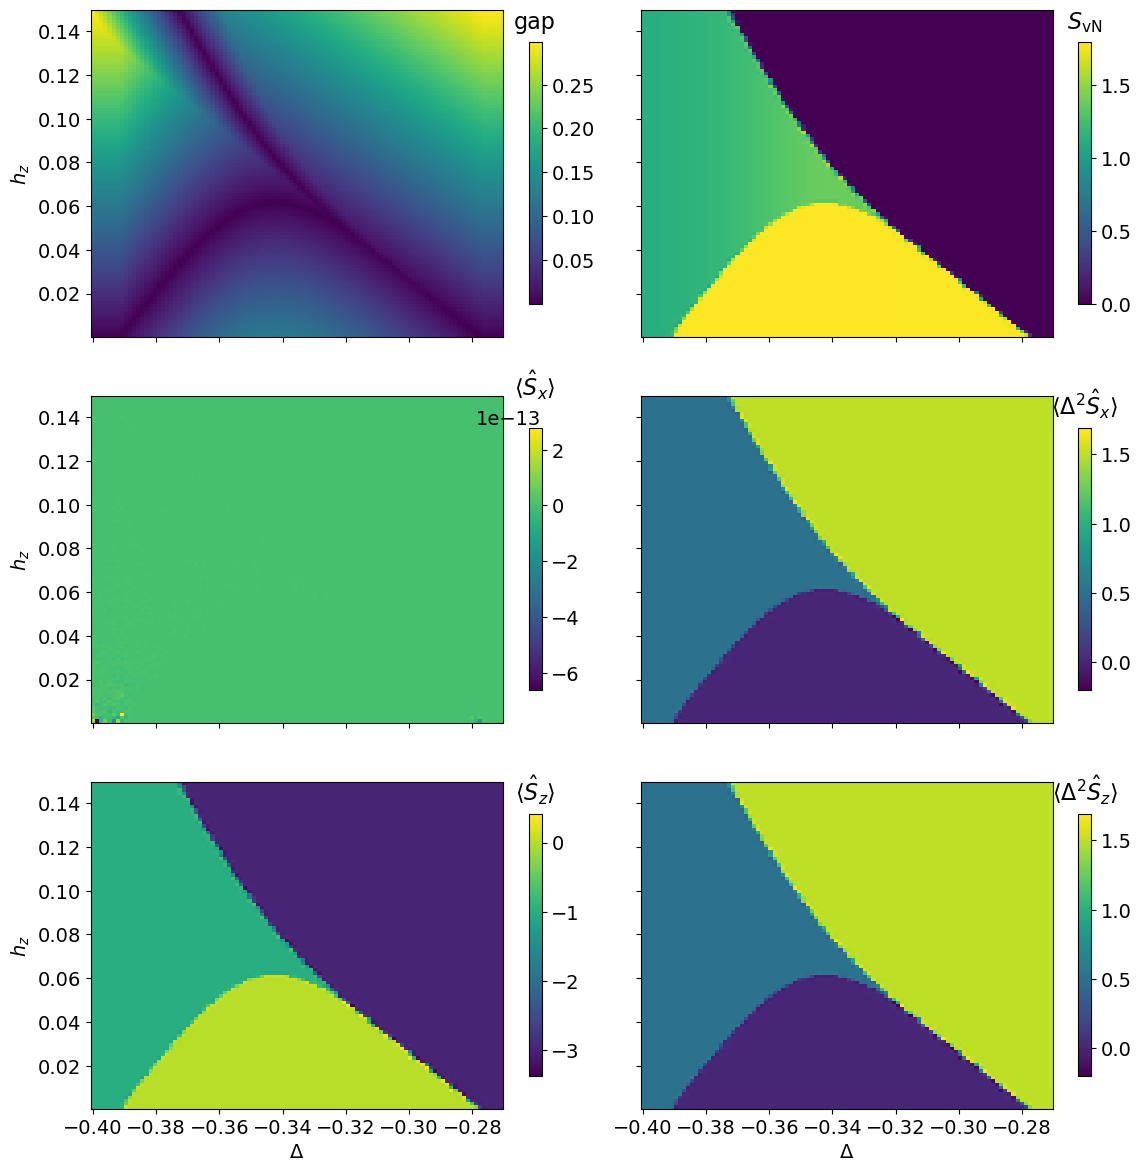

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharey = True, sharex = True)

############
observable = 'gap'
x = df_all["delta"]
y = df_all["hz"]
z = df_all['E_1']-df_all['E_0']
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')

im1 = axes[0, 0].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar1 = fig.colorbar(im1, ax=axes[0, 0], shrink=0.8)  # Shrink the colorbar
cbar1.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
 
 
############
observable = 'SvN'
x = df_all["delta"]
y = df_all["hz"]
z = df_all[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im3 = axes[0,1].pcolormesh(X, Y, Z, cmap=cmap_string, vmin = 0, vmax = max(z), shading='auto')
cbar3 = fig.colorbar(im3, ax=axes[0,1], shrink=0.8)  # Shrink the colorbar
cbar3.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar

############
observable = 'Sx'
x = df_all["delta"]
y = df_all["hz"]
z = df_all[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im2 = axes[1, 0].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar2 = fig.colorbar(im2, ax=axes[1, 0], shrink=0.8)  # Shrink the colorbar
cbar2.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar

############
observable = 'Sx_var'
x = df_all["delta"]
y = df_all["hz"]
z = df_all[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im2 = axes[1, 1].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar2 = fig.colorbar(im2, ax=axes[1, 1], shrink=0.8)  # Shrink the colorbar
cbar2.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
 
############
observable = 'Sz'
x = df_all["delta"]
y = df_all["hz"]
z = df_all[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im2 = axes[2, 0].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar2 = fig.colorbar(im2, ax=axes[2, 0], shrink=0.8)  # Shrink the colorbar
cbar2.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar

############
observable = 'Sz_var'
x = df_all["delta"]
y = df_all["hz"]
z = df_all[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im2 = axes[2, 1].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar2 = fig.colorbar(im2, ax=axes[2, 1], shrink=0.8)  # Shrink the colorbar
cbar2.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
 

axes[2,0].set_xlabel(r'$\Delta$')
axes[2,1].set_xlabel(r'$\Delta$')

axes[0,0].set_ylabel(r'$h_z$')
axes[1,0].set_ylabel(r'$h_z$')
axes[2,0].set_ylabel(r'$h_z$')


plt.tight_layout()
plt.savefig("fig0.png",dpi=600, format="png")
plt.show()

As we can see, the density plot of $\langle\hat{S}_z\rangle$ or $S_{\rm vN}$ clearly show existence of distinct phases in the model, characterized by different entanglement properties.

### Unsupervised analysis

Let us performe unsupervised analysis of the ground state properties. We will check if Cholesky vectors $A_{vec}$ are indeed grouped in distinct clusters. We will perform PCA and t-SNE dimensionality reduction, projecting each Cholesky vector onto two-dimensional plane.

#### PCA and t-SNE on Cholesky vectors

In [12]:
all_vectors = np.stack(df_all['A_gs_vec'].values)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_vectors)

# Add PCA results to DataFrame
df_all['PCA1'] = reduced_data[:, 0]
df_all['PCA2'] = reduced_data[:, 1]

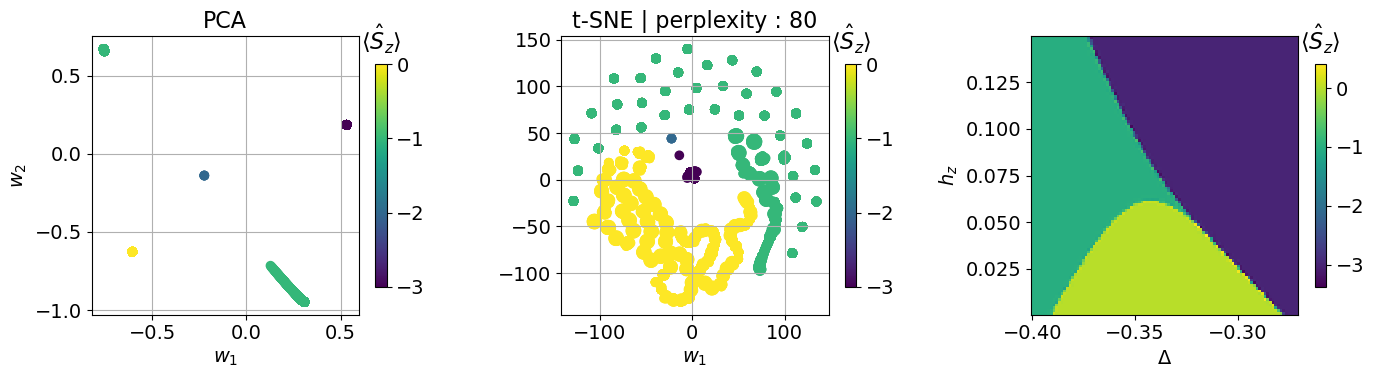

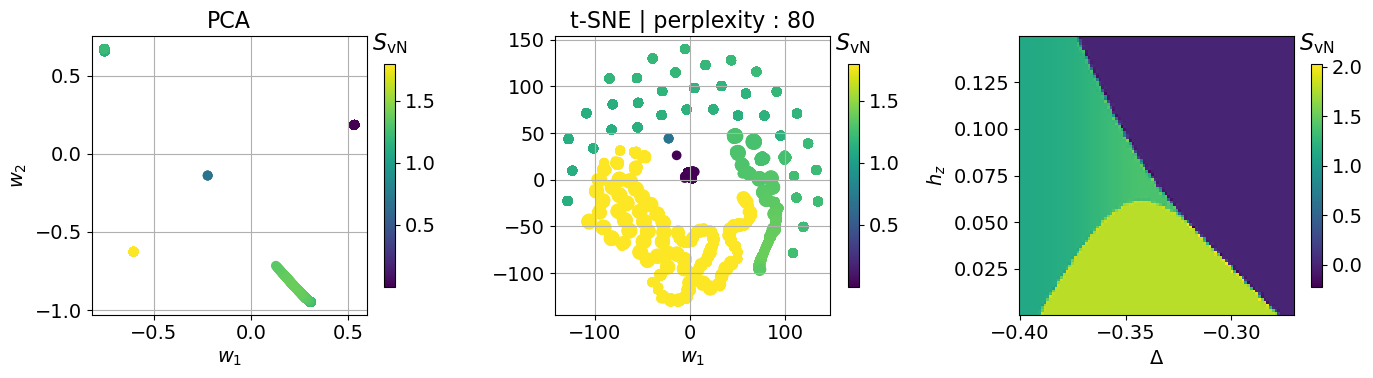

In [45]:
all_vectors = np.stack(df_all['A_gs_vec'].values)

#perplexity_vec = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
perplexity_vec = [80]
for perplexity in perplexity_vec:
    
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_data = tsne.fit_transform(all_vectors)
    
    # Add t-SNE results to DataFrame
    df_all['tSNE1'] = tsne_data[:, 0]
    df_all['tSNE2'] = tsne_data[:, 1]
    
    
    observable = 'Sz'  
  
    
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    
    # Subplot 1: PCA scatter plot
    sc1 = axes[0].scatter(df_all['PCA1'], df_all['PCA2'], c=df_all[observable], cmap=cmap_string, alpha=1)
    cbar1 = fig.colorbar(sc1, ax=axes[0], shrink=0.8)  # Shrink the colorbar
    cbar1.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
    
    axes[0].set_xlabel(r'$w_1$')
    axes[0].set_ylabel(r'$w_2$')
    axes[0].set_title('PCA')
    axes[0].grid(True)
    
    # Subplot 2: t-SNE scatter plot
    sc2 = axes[1].scatter(df_all['tSNE1'], df_all['tSNE2'], c=df_all[observable], cmap=cmap_string, alpha=1)
    cbar2 = fig.colorbar(sc2, ax=axes[1], shrink=0.8)  # Shrink the colorbar
    cbar2.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
    
    axes[1].set_xlabel(r'$w_1$')
    axes[1].set_title('t-SNE | perplexity : {:d}'.format(perplexity))
    axes[1].grid(True)
    
    # Subplot 3: Colormap
    
    x = df_all["delta"]
    y = df_all["hz"]
    z = df_all[observable]
    
    # Create a structured grid
    grid_x = np.linspace(x.min(), x.max(), 100)
    grid_y = np.linspace(y.min(), y.max(), 100)
    X, Y = np.meshgrid(grid_x, grid_y)
    
    # Interpolate z values onto the grid
    Z = griddata((x, y), z, (X, Y), method='cubic')
    
    
    im3 = axes[2].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
    cbar3 = fig.colorbar(im3, ax=axes[2], shrink=0.8)  # Shrink the colorbar
    cbar3.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
    
    #axes[2].set_xticks([-2, -1, 0, 1, 2])
    axes[2].set_xlabel(r'$\Delta$')
    axes[2].set_ylabel(r'$h_z$')
    
    plt.tight_layout()
    plt.savefig("fig1_perplexity.{:03d}_Sz_coloring.png".format(perplexity),dpi=600, format="png")
    plt.show()
    
    
    #############
    
    observable = 'SvN'
  
    
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    
    # Subplot 1: PCA scatter plot
    sc1 = axes[0].scatter(df_all['PCA1'], df_all['PCA2'], c=df_all[observable], cmap=cmap_string, alpha=1)
    cbar1 = fig.colorbar(sc1, ax=axes[0], shrink=0.8)  # Shrink the colorbar
    cbar1.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
    
    axes[0].set_xlabel(r'$w_1$')
    axes[0].set_ylabel(r'$w_2$')
    axes[0].set_title('PCA')
    axes[0].grid(True)
    
    # Subplot 2: t-SNE scatter plot
    sc2 = axes[1].scatter(df_all['tSNE1'], df_all['tSNE2'], c=df_all[observable], cmap=cmap_string, alpha=1)
    cbar2 = fig.colorbar(sc2, ax=axes[1], shrink=0.8)  # Shrink the colorbar
    cbar2.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
    
    axes[1].set_xlabel(r'$w_1$')
    axes[1].set_title('t-SNE | perplexity : {:d}'.format(perplexity))
    axes[1].grid(True)
    
    # Subplot 3: Colormap
    
    x = df_all["delta"]
    y = df_all["hz"]
    z = df_all[observable]
    
    # Create a structured grid
    grid_x = np.linspace(x.min(), x.max(), 100)
    grid_y = np.linspace(y.min(), y.max(), 100)
    X, Y = np.meshgrid(grid_x, grid_y)
    
    # Interpolate z values onto the grid
    Z = griddata((x, y), z, (X, Y), method='cubic')
    
    
    im3 = axes[2].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
    cbar3 = fig.colorbar(im3, ax=axes[2], shrink=0.8)  # Shrink the colorbar
    cbar3.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
    
    #axes[2].set_xticks([-2, -1, 0, 1, 2])
    axes[2].set_xlabel(r'$\Delta$')
    axes[2].set_ylabel(r'$h_z$')
    
    plt.tight_layout()
    plt.savefig("fig1_perplexity.{:03d}_SvN_coloring.png".format(perplexity),dpi=600, format="png")
    plt.show()

As we can see, the linear PCA dimensionality reduction clearly projects density matrices (represented as Cholesky vectors) onto well separated clusters, where each cluster is characterized by value of $\langle\hat{S}_z\rangle$. We can also see clusterization with t-SNE approach. Color encoding of biparte entanglement entropy $S_{\rm vN}$, however, does not encodes clusters separately.

# Autoencoder
### Unsupervised phase detection with reconstruction loss
Our aim is to train autoencoder (AE) transforming ground state Cholesky vector for given $\{\Delta, h_z\}$. Next, training AE on some randomly chosen set of parameters $\{\Delta, h_z\}$ having $M$ elements, we will plot reconstruction loss vs full range of $\{\Delta, h_z\}$. The main questions is: will we see 'phase boundaries' as on the $\langle\hat{S}_z\rangle$ phase diagram?

Let us start with defining training dataset

In [46]:
import torch as pt
from matplotlib.patches import Rectangle

In [47]:
M = 200
df = df_all.sample(n = M, random_state=121)
X = np.stack(df['A_gs_vec'].values)
X_tensor = pt.tensor(X, dtype=pt.float32)

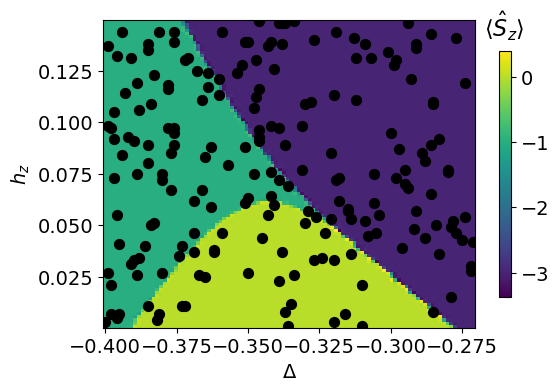

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

observable = 'Sz'
x = df_all["delta"]
y = df_all["hz"]
z = df_all[observable]

grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')

im1 = ax.pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar1 = fig.colorbar(im1, ax=ax, shrink=0.8)  # Shrink the colorbar
cbar1.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar


ax.set_xlabel(r'$\Delta$')
ax.set_ylabel(r'$h_z$')
 
ax.scatter(df["delta"], df["hz"], color="black", s=50)

plt.show()

### AE model definition
Let us build AE:
1. Encoder: linear layers : (input, hidden_layer_1, hidden_layer_2, bottleneck)
2. Decoder: linear layers : (bottleneck, hidden_layer_2, hidden_layer_1, output)

In [69]:
class Autoencoder(pt.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2,   bottleneck_dim):
        """
        Autoencoder with configurable bottleneck size, two hidden layers, and dropout.

        Parameters:
        - input_dim: Number of input features
        - hidden_dim1: Size of the first hidden layer
        - hidden_dim2: Size of the second hidden layer
        - bottleneck_dim: Size of the bottleneck layer
        - dropout_prob: Dropout probability (default: 0.2)
        """
        super(Autoencoder, self).__init__()
        
        # Encoder: Two hidden layers + bottleneck
        self.encoder = pt.nn.Sequential(
            pt.nn.Linear(input_dim, hidden_dim1),
            pt.nn.ReLU(),
            pt.nn.Dropout(0.2),
            pt.nn.Linear(hidden_dim1, hidden_dim2),
            pt.nn.ReLU(),
            pt.nn.Dropout(0.2),
            pt.nn.Linear(hidden_dim2, bottleneck_dim),
            pt.nn.LeakyReLU(0.3)
        )
        
        # Decoder: Reverse architecture of the encoder
        self.decoder = pt.nn.Sequential(
            pt.nn.Linear(bottleneck_dim, hidden_dim2),
            pt.nn.ReLU(),
            pt.nn.Dropout(0.2),
            pt.nn.Linear(hidden_dim2, hidden_dim1),
            pt.nn.ReLU(),
            pt.nn.Dropout(0.2),
            pt.nn.Linear(hidden_dim1, input_dim), 
            pt.nn.LeakyReLU(0.3)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Dynamically set input_dim based on data shape
input_dim = X_tensor.shape[1] 
hidden_dim1 = input_dim//2
hidden_dim2 = input_dim//2
#bottleneck = input_dim//2
bottleneck = int(2**(L-2))

### Training loop

In [70]:
# Initialize model, loss, and optimizer
model = Autoencoder(input_dim, hidden_dim1, hidden_dim2, bottleneck)
criterion = pt.nn.MSELoss()
optimizer = pt.optim.Adam(model.parameters(), lr=0.0001)

# Print model structure for debugging
print(model)

# Training loop
epochs = 100
batch_size = 128
dataset = pt.utils.data.TensorDataset(X_tensor)
dataloader = pt.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

print("Training the autoencoder...")
for epoch in range(epochs):
    for batch in dataloader:
        inputs = batch[0]  # Get batch inputs
        
        # Ensure correct shape before forward pass
        if len(inputs.shape) == 1:  # If input is 1D, reshape to (1, num_features)
            inputs = inputs.unsqueeze(0)
        
        latent, outputs = model(inputs)
        loss = criterion(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if(epoch%10==0):
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=4160, out_features=2080, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=2080, out_features=2080, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=2080, out_features=16, bias=True)
    (7): LeakyReLU(negative_slope=0.3)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=2080, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=2080, out_features=2080, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=2080, out_features=4160, bias=True)
    (7): LeakyReLU(negative_slope=0.3)
  )
)
Training the autoencoder...
Epoch [1/100], Loss: 0.0005
Epoch [11/100], Loss: 0.0002
Epoch [21/100], Loss: 0.0002
Epoch [31/100], Loss: 0.0002
Epoch [41/100], Loss: 0.0002
Epoch [51/100], Loss: 0.0001
Epoch [61/100], Loss: 0.0001
Epoch [71/100], Los

### Reconstruction loss phase diagram

Now, we will pass Cholesky vector $A_{vec}$ through trained AE for all range of parameters $\{\Delta, h_z\}$, obtaining $A_{vec, decoded}$. For each $\{\Delta, h_z\}$, we will:
1. Store reconstruction loss
2. Map $A_{vec, decoded}$ to proper density matrix $\hat{\rho}_{decoded}$
3. Calculate all observables for decoded density matrix $\hat{\rho}_{decoded}$

In [71]:
# Update loss criterion to output per-sample loss
criterion = pt.nn.MSELoss(reduction='none')

batch_size = 64
df_all_decoded = []

with pt.no_grad():
    for start_idx in range(0, len(df_all), batch_size):
        batch = df_all.iloc[start_idx:start_idx + batch_size]
        A_gs_vec_true = pt.tensor(np.stack(batch['A_gs_vec']), dtype=pt.float32)

        # Pass batch through the model
        A_gs_vec_latent, A_gs_vec_decoded = model(A_gs_vec_true)

        # Compute per-sample losses
        loss_per_sample = criterion(A_gs_vec_decoded, A_gs_vec_true).mean(dim=1)

        # Post-process each sample in the batch
        for idx, (vec_decoded, vec_latent, true_loss) in enumerate(
            zip(A_gs_vec_decoded, A_gs_vec_latent, loss_per_sample)
        ):
            vec_decoded_np = vec_decoded.numpy()
            A_gs_decoded = cholesky_vector_to_cholesky_matrix(vec_decoded_np)
            rho_gs_decoded = A_gs_decoded @ A_gs_decoded.conj().T / np.trace(
                A_gs_decoded @ A_gs_decoded.conj().T
            )
            _, SvN_decoded = get_SvN(rho_gs_decoded)

            # Compute observables
            Sx_decoded = np.trace(Sx_total @ rho_gs_decoded).real
            Sy_decoded = np.trace(Sy_total @ rho_gs_decoded).real
            Sz_decoded = np.trace(Sz_total @ rho_gs_decoded).real
            Sx_var_decoded = np.trace(Sx_total @ Sx_total @ rho_gs_decoded).real - Sx_decoded**2
            Sy_var_decoded = np.trace(Sy_total @ Sy_total @ rho_gs_decoded).real - Sy_decoded**2
            Sz_var_decoded = np.trace(Sz_total @ Sz_total @ rho_gs_decoded).real - Sz_decoded**2

            row_decoded = batch.iloc[idx].to_dict()
            row_decoded.update({
                'loss': true_loss.item(),
                'A_gs_vec_decoded': vec_decoded_np,
                'A_gs_vec_latent': vec_latent.numpy(),
                'SvN_decoded': SvN_decoded,
                'Sx_decoded': Sx_decoded,
                'Sy_decoded': Sy_decoded,
                'Sz_decoded': Sz_decoded,
                'Sx_var_decoded': Sx_var_decoded,
                'Sy_var_decoded': Sy_var_decoded,
                'Sz_var_decoded': Sz_var_decoded,
            })
            df_all_decoded.append(row_decoded)

df_all_decoded = pd.DataFrame(df_all_decoded)
print("Done ...")

Done ...


# Reconstruction loss phase diagram
Finally, we can plot reconstruction loss phase diagram, and see expectation values of observables on decoded density matrix

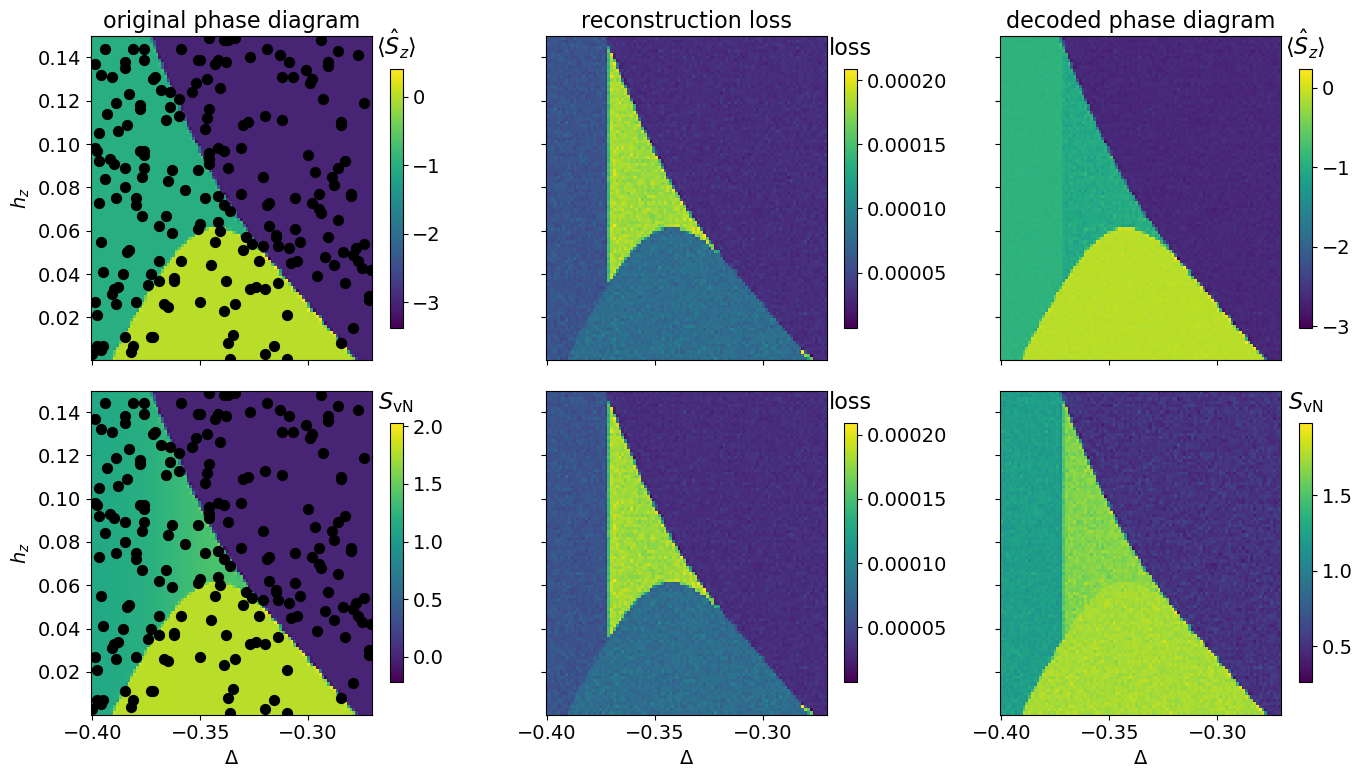

In [72]:
fig, ax = plt.subplots(2, 3, figsize=(14, 8), sharey = True, sharex = True)

observable = 'Sz'
x = df_all_decoded["delta"]
y = df_all_decoded["hz"]
z = df_all_decoded[observable]

grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')

im1 = ax[0,0].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar1 = fig.colorbar(im1, ax=ax[0,0], shrink=0.8)  # Shrink the colorbar
cbar1.ax.set_title(r"$\langle\hat{S}_z\rangle$", pad=10)  # Label on top of the colorbar
 
# Plot the third heatmap (using the same data for demonstration)
observable = 'loss'
x = df_all_decoded["delta"]
y = df_all_decoded["hz"]
z = df_all_decoded[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im3 = ax[0,1].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar3 = fig.colorbar(im3, ax=ax[0,1], shrink=0.8)  # Shrink the colorbar
cbar3.ax.set_title(r"loss", pad=10)  # Label on top of the colorbar
 
# Plot the third heatmap (using the same data for demonstration)
observable = 'Sz_decoded'
x = df_all_decoded["delta"]
y = df_all_decoded["hz"]
z = df_all_decoded[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im3 = ax[0,2].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar3 = fig.colorbar(im3, ax=ax[0,2], shrink=0.8)  # Shrink the colorbar
cbar3.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar

observable = 'SvN'
x = df_all_decoded["delta"]
y = df_all_decoded["hz"]
z = df_all_decoded[observable]

grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')

im1 = ax[1,0].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar1 = fig.colorbar(im1, ax=ax[1,0], shrink=0.8)  # Shrink the colorbar
cbar1.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar
 
# Plot the third heatmap (using the same data for demonstration)
observable = 'loss'
x = df_all_decoded["delta"]
y = df_all_decoded["hz"]
z = df_all_decoded[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im3 = ax[1,1].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar3 = fig.colorbar(im3, ax=ax[1,1], shrink=0.8)  # Shrink the colorbar
cbar3.ax.set_title(r"loss", pad=10)  # Label on top of the colorbar

observable = 'SvN_decoded'
x = df_all_decoded["delta"]
y = df_all_decoded["hz"]
z = df_all_decoded[observable]
grid_x = np.linspace(x.min(), x.max(), 100)
grid_y = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(grid_x, grid_y)
Z = griddata((x, y), z, (X, Y), method='cubic')
im3 = ax[1,2].pcolormesh(X, Y, Z, cmap=cmap_string, shading='auto')
cbar3 = fig.colorbar(im3, ax=ax[1,2], shrink=0.8)  # Shrink the colorbar
cbar3.ax.set_title(get_observable_string(observable), pad=10)  # Label on top of the colorbar

ax[0,0].set_title("original phase diagram")
ax[0,1].set_title("reconstruction loss")
ax[0,2].set_title("decoded phase diagram")
ax[1,0].set_xlabel(r'$\Delta$')
ax[1,1].set_xlabel(r'$\Delta$')
ax[1,2].set_xlabel(r'$\Delta$')

ax[0,0].set_ylabel(r'$h_z$')
ax[1,0].set_ylabel(r'$h_z$')
 
ax[0,0].scatter(df["delta"], df["hz"], color="black", s=50)
ax[1,0].scatter(df["delta"], df["hz"], color="black", s=50)

plt.tight_layout()
plt.savefig("phase_diagram_reconstruction_loss.png", dpi=100, format="png")
plt.show()

# PCA on latent representation

Now, let's have a look at linear PCA analysis of low-dimensional latent representation of our ground states

(19370, 16)


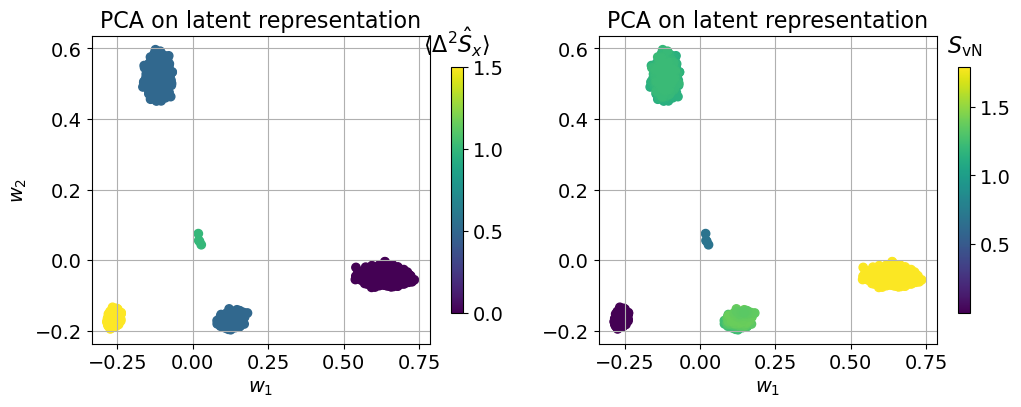

In [73]:
all_vectors = np.stack(df_all_decoded['A_gs_vec_latent'])
print(all_vectors.shape)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_vectors)

# Add PCA results to DataFrame
df_all_decoded['PCA1'] = reduced_data[:, 0]
df_all_decoded['PCA2'] = reduced_data[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
observable_1 = 'Sx_var'
observable_2 = 'SvN'
# Subplot 1: PCA scatter plot
sc1 = axes[0].scatter(df_all_decoded['PCA1'], df_all_decoded['PCA2'], c=df_all_decoded[observable_1], cmap=cmap_string, alpha=1)
cbar1 = fig.colorbar(sc1, ax=axes[0], shrink=0.8)  # Shrink the colorbar
cbar1.ax.set_title(get_observable_string(observable_1), pad=10)  # Label on top of the colorbar

# Subplot 1: PCA scatter plot
sc1 = axes[1].scatter(df_all_decoded['PCA1'], df_all_decoded['PCA2'], c=df_all_decoded[observable_2], cmap=cmap_string, alpha=1)
cbar1 = fig.colorbar(sc1, ax=axes[1], shrink=0.8)  # Shrink the colorbar
cbar1.ax.set_title(get_observable_string(observable_2), pad=10)  # Label on top of the colorbar

axes[0].set_xlabel(r'$w_1$')
axes[1].set_xlabel(r'$w_1$')
axes[0].set_ylabel(r'$w_2$')
axes[0].set_title('PCA on latent representation')
axes[1].set_title('PCA on latent representation')
axes[0].grid(True)
axes[1].grid(True)

# Results

#### 1. As we can see, reconstruction loss is able to indicate possible boundaries on phase diagram. The reconstructed density matrices on parameters outside of the training range have observables expectation values close to the true one.

#### 2. Autoencoder can to compress $L = 6$ spins state, described by $2\times 2^L$ numbers (real and imaginary part), into latent representation containing $2^{L-2}$ real numbers only with a good reconstruction quality!



# Exercise:
1. Check what is minimal value of bottleneck size allowing reconstruction phase diagram to a good accuracy.